In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (57).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (6).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (5).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (24).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (42).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (9).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (37).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (30).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (59).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (50).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (20).jpg
/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (14).jpg
/kaggle

**Import Directory**

In [2]:
import os
dircs=os.listdir('/kaggle/input/Fishdiseasedataset/combine/FishDisease/')

In [3]:
X_directory=[]
y_directory=[]
for directory in dircs:
    image_paths=os.listdir(f'/kaggle/input/Fishdiseasedataset/combine/FishDisease/{directory}')
    for img_name in image_paths:
        X_directory.append(f'/kaggle/input/Fishdiseasedataset/combine/FishDisease/{directory}/{img_name}')
        y_directory.append(directory)

In [4]:
df={"fishimages":X_directory,"fishlabels":y_directory}

In [5]:
df = pd.DataFrame(df)
df.style

,fishimages,fishlabels
0,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-166.png,white spot
1,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-246.png,white spot
2,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-263.png,white spot
3,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-264.png,white spot
4,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-92.png,white spot
5,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-123.png,white spot
6,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-93.png,white spot
7,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-29.png,white spot
8,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-223.png,white spot
9,/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/white-spot-45.png,white spot


In [6]:
import pandas as pd
import numpy as np
df=pd.DataFrame(df)

**OneHotEncoding**

In [7]:
from sklearn.preprocessing import OneHotEncoder
df = df.sample(frac=1).reset_index(drop=True)
onehot=OneHotEncoder()
lab=onehot.fit_transform(df['fishlabels'].values.reshape(-1,1)).toarray()
images=df['fishimages']
print('total labels of images',len(lab))
print('total images',len(images))
LAB2=onehot.inverse_transform((lab))
print(lab)
print(LAB2.ravel())    

total labels of images 1382
total images 1382
[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]
['red spot' 'fresh fish' 'black spot' ... 'black spot' 'fresh fish'
 'white spot']


**Preprocessing**

In [8]:
import cv2
import matplotlib.pyplot as plt
imgs=[]
for img in images:
    if img.startswith("/kaggle/input/Fishdiseasedataset/combine/FishDisease/white spot/"):
        other_imag = cv2.imread(img)

        other_frame = cv2.resize(other_imag,(224,224))
        kernel = np.array([[0, -1, 0],
               [-1, 5,-1],
               [0, -1, 0]])
        image_sharp = cv2.filter2D(src=other_frame, ddepth=-1, kernel=kernel)
        hsv = cv2.cvtColor(image_sharp, cv2.COLOR_BGR2HSV)

    
        lower_white = np.array([0,0,168], dtype=np.uint8)
        upper_white = np.array([172,111,255],dtype=np.uint8)

        
        mask = cv2.inRange(hsv, lower_white, upper_white)
        
        res = cv2.bitwise_and(image_sharp,image_sharp, mask= mask)
        imgs.append(res)
         
    elif img.startswith("/kaggle/input/Fishdiseasedataset/combine/FishDisease/red spot/"):
        imag = cv2.imread(img)

        frame = cv2.resize(imag,(224,224)) 

        kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
        image_sharp = cv2.filter2D(src=frame, ddepth=-1, kernel=kernel)
        hsv = cv2.cvtColor(image_sharp,cv2.COLOR_BGR2HSV)

        lower_red = np.array([0,50,50])
        upper_red = np.array([10,255,255])


      
        lower_red2 = np.array([170,50,50])
        upper_red2 = np.array([180,255,255])

        mask = cv2.inRange(hsv, lower_red, upper_red)
        res = cv2.bitwise_and(image_sharp,image_sharp, mask= mask)


        mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
        res2 = cv2.bitwise_and(image_sharp,image_sharp, mask= mask2)

        red=res+res2
        imgs.append(red)
    elif img.startswith("/kaggle/input/Fishdiseasedataset/combine/FishDisease/black spot/"):
        other_imag = cv2.imread(img)

        other_frame = cv2.resize(other_imag,(224,224))
        kernel = np.array([[0, -1, 0],
               [-1, 5,-1],
               [0, -1, 0]])
        image_sharp = cv2.filter2D(src=other_frame, ddepth=-1, kernel=kernel)
        imagehsv = cv2.cvtColor(image_sharp, cv2.COLOR_BGR2HSV)


        lower_black = np.array([0,0,0])
        upper_black = np.array([179,255,127])

        imagemask = cv2.inRange(imagehsv, lower_black, upper_black)
        result = cv2.bitwise_not(image_sharp,image_sharp, mask=imagemask)

        imgs.append(result)
    elif img.startswith("/kaggle/input/Fishdiseasedataset/combine/FishDisease/fresh fish/"):
        other_imag = cv2.imread(img)

        other_frame = cv2.resize(other_imag,(224,224))
        kernel = np.array([[0, -1, 0],
               [-1, 5,-1],
               [0, -1, 0]])
        image_sharp = cv2.filter2D(src=other_frame, ddepth=-1, kernel=kernel)

        imgs.append(image_sharp)

In [9]:
X_preprocess=np.array(imgs)
y_preprocess=np.array(lab)

In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mimg
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,7)
from PIL import Image
from scipy import misc

import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


# DEEP LEARNING IMPORTS
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Activation, Dropout, Flatten, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

**Data Split**

In [11]:

train_x, test_x, train_y, test_y = train_test_split(X_preprocess, y_preprocess, random_state = 42,
                                                   test_size=0.20)

In [12]:
X_train_norm=train_x/255.0
X_test_norm=test_x/255.0

In [13]:
y_single_dim=np.argmax(train_y,axis=1)

**Data Augmentation**

In [14]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
 rotation_range=30,
 featurewise_center=True,   
 zoom_range=0.2,
 horizontal_flip=True,
 vertical_flip=True,

 fill_mode="nearest")

In [15]:
test_datagen=ImageDataGenerator()

In [16]:
train_generator=train_datagen.flow(X_train_norm, train_y,batch_size=20)

In [17]:
validation_generator=test_datagen.flow(X_test_norm, test_y,batch_size=20)

In [20]:
# (train_generator.n)//20+1
# (1105/20)+1=56

In [23]:
import numpy as np
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization   
from keras.callbacks import EarlyStopping
from keras import regularizers
model=Sequential()
model.add(Conv2D(16,3,3, padding='same',input_shape=(224,224,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=1, padding='valid'))
model.add(Dropout(0.1))
# model.add(Conv2D(112,5,5, padding='same',activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2),strides=1, padding='valid'))
# model.add(Dropout(0.1))
model.add(Conv2D(256,5,5, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=1, padding='valid'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(448, activation='relu'))
model.add(Dense(4, activation='softmax'))

opt = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])




es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)



history = model.fit_generator(train_generator,
                    validation_data=validation_generator,
                   
                    steps_per_epoch = 56,
                    epochs = 30,
                    callbacks=[es],          
                    workers=-1)

Epoch 1/30
56/56 [==============================] - 12s 204ms/step - loss: 0.7795 - accuracy: 0.6507 - val_loss: 0.3714 - val_accuracy: 0.8628
Epoch 2/30
56/56 [==============================] - 12s 209ms/step - loss: 0.3518 - accuracy: 0.8751 - val_loss: 0.2853 - val_accuracy: 0.9025
Epoch 3/30
56/56 [==============================] - 11s 204ms/step - loss: 0.2761 - accuracy: 0.9068 - val_loss: 0.3194 - val_accuracy: 0.9025
Epoch 4/30
56/56 [==============================] - 12s 211ms/step - loss: 0.2132 - accuracy: 0.9231 - val_loss: 0.2519 - val_accuracy: 0.9025
Epoch 5/30
56/56 [==============================] - 11s 205ms/step - loss: 0.1817 - accuracy: 0.9285 - val_loss: 0.1678 - val_accuracy: 0.9531
Epoch 6/30
56/56 [==============================] - 11s 204ms/step - loss: 0.1755 - accuracy: 0.9403 - val_loss: 0.1462 - val_accuracy: 0.9531
Epoch 7/30
56/56 [==============================] - 12s 214ms/step - loss: 0.1491 - accuracy: 0.9448 - val_loss: 0.0942 - val_accuracy: 0.9783

In [24]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 75, 75, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       102656    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 256)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)            

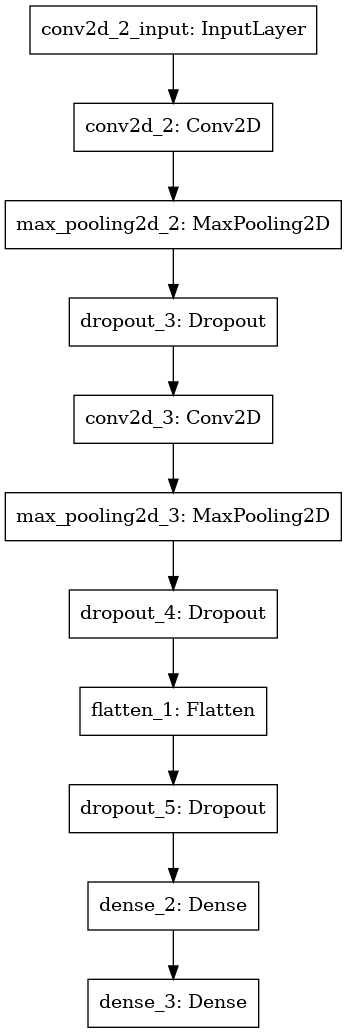

In [25]:
from keras.utils.vis_utils import plot_model
import tensorflow as tf
tf.keras.utils.plot_model(
model, to_file='model.png', show_shapes=False, show_dtype=False,
show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

In [26]:

scores = model.evaluate(X_test_norm, test_y,batch_size=20)
print ( scores )

14/14 [==============================] - 0s 9ms/step - loss: 0.1276 - accuracy: 0.9567
[0.12757159769535065, 0.9566786885261536]


Confusion Matrix
[[70  2  0  0]
 [ 0 68  0  1]
 [ 0  0 59  9]
 [ 0  0  0 68]]
['Black Spot', 'Fresh Fish', 'Red Spot', 'White Spot']


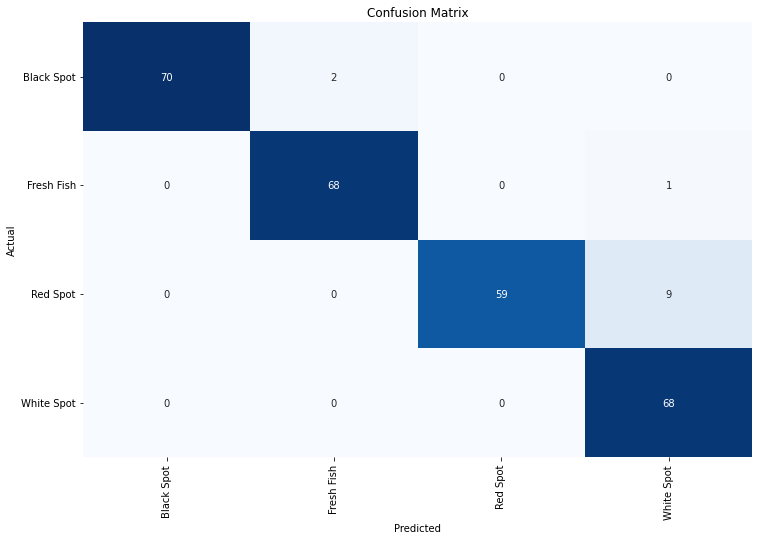

In [27]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
import seaborn as sns
y_test_arg=np.argmax(test_y,axis=1)
Y_pred = np.argmax(model.predict(X_test_norm),axis=1)
print('Confusion Matrix')
cm=confusion_matrix(y_test_arg, Y_pred)
print(cm)
class_name={0:"Black Spot",1:"Fresh Fish",2:"Red Spot",3:"White Spot"}
classes=list(class_name.values())
print(classes)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
plt.xticks(np.arange(4)+.5,classes, rotation=90)
plt.yticks(np.arange(4)+.5, classes, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [28]:
print('classification report')
print(classification_report(y_test_arg,Y_pred,target_names=classes, digits= 4))

classification report
              precision    recall  f1-score   support

  Black Spot     1.0000    0.9722    0.9859        72
  Fresh Fish     0.9714    0.9855    0.9784        69
    Red Spot     1.0000    0.8676    0.9291        68
  White Spot     0.8718    1.0000    0.9315        68

    accuracy                         0.9567       277
   macro avg     0.9608    0.9563    0.9562       277
weighted avg     0.9614    0.9567    0.9568       277



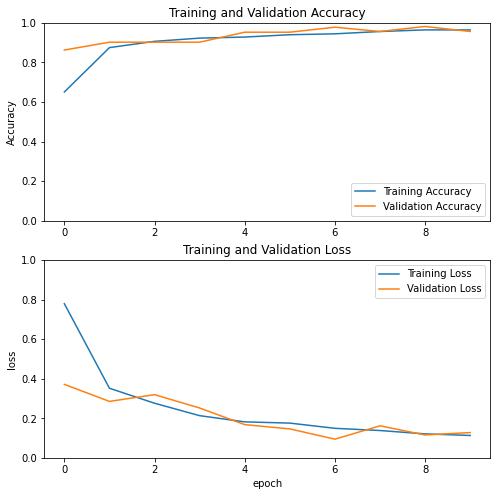

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([0,1.0])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('loss')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [30]:
model.save('augmentation.h5')

In [31]:
def img_for_pred(img_path):
 
    if img_path.startswith("/kaggle/input/Fishdiseasedataset/combine/Prediction/red spot/"):
            img = cv2.imread(img_path)
            frame = cv2.resize(img,(224,224)) 

            
            kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
            image_sharp = cv2.filter2D(src=frame, ddepth=-1, kernel=kernel)
            hsv = cv2.cvtColor(image_sharp,cv2.COLOR_BGR2HSV)
        
           

            lower_red = np.array([0,50,50])
            upper_red = np.array([10,255,255])


           
            lower_red2 = np.array([170,50,50])
            upper_red2 = np.array([180,255,255])

            mask = cv2.inRange(hsv, lower_red, upper_red)
            res = cv2.bitwise_and(image_sharp,image_sharp, mask= mask)


            mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
            res2 = cv2.bitwise_and(image_sharp,image_sharp, mask= mask2)

            img3 = res+res2
            
            
            return img3
    
    elif img_path.startswith("/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/"):
            img = cv2.imread(img_path)
            frame = cv2.resize(img,(224,224)) 

            
            kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
            image_sharp = cv2.filter2D(src=frame, ddepth=-1, kernel=kernel)
            
            return image_sharp

In [32]:
r=img_for_pred("/kaggle/input/Fishdiseasedataset/combine/Prediction/red spot/Red Spot.jpg")
r1=img_for_pred("/kaggle/input/Fishdiseasedataset/combine/Prediction/red spot/EUS  (9).jpg")
r2=img_for_pred("/kaggle/input/Fishdiseasedataset/combine/Prediction/red spot/Red Spot (10).jpg")

In [33]:
original_red=cv2.imread("/kaggle/input/Fishdiseasedataset/combine/Prediction/red spot/Red Spot.jpg")
original1_red=cv2.imread("/kaggle/input/Fishdiseasedataset/combine/Prediction/red spot/EUS  (9).jpg")
original2_red=cv2.imread("/kaggle/input/Fishdiseasedataset/combine/Prediction/red spot/Red Spot (10).jpg")

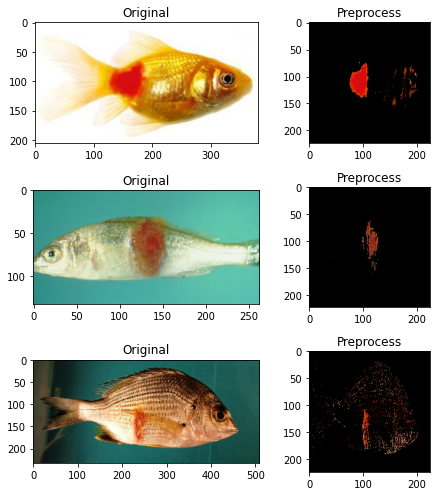

In [34]:
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(331)
plt.imshow(cv2.cvtColor(original_red, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.subplot(332)
plt.imshow(cv2.cvtColor(r, cv2.COLOR_BGR2RGB))
plt.title("Preprocess")
plt.subplot(334)
plt.tight_layout()
plt.imshow(cv2.cvtColor(original1_red, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.subplot(335)
plt.imshow(cv2.cvtColor(r1, cv2.COLOR_BGR2RGB))
plt.title("Preprocess")
plt.subplot(337)
plt.tight_layout()
plt.imshow(cv2.cvtColor(original2_red, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.subplot(338)
plt.imshow(cv2.cvtColor(r2, cv2.COLOR_BGR2RGB))
plt.title("Preprocess")
plt.tight_layout()


In [35]:
p=model.predict(r[np.newaxis, ...])
labels ={0:"Black Spot",1:"Fresh Fish",2:"Red Spot",3:"White Spot"}
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:", predicted_class, "\n\n")

Classified: Red Spot 




In [36]:
p=model.predict(r1[np.newaxis, ...])
labels ={0:"Black Spot",1:"Fresh Fish",2:"Red Spot",3:"White Spot"}
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:", predicted_class, "\n\n")

Classified: Red Spot 




In [37]:
p=model.predict(r2[np.newaxis, ...])
class_name={0:"Black Spot",1:"Fresh Fish",2:"Red Spot",3:"White Spot"}
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:", predicted_class, "\n\n")

Classified: Red Spot 




In [38]:
fresh=img_for_pred("/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (22).jpg")
fresh1=img_for_pred("/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (16).jpg")

In [39]:
original=cv2.imread("/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (22).jpg")
original1=cv2.imread("/kaggle/input/Fishdiseasedataset/combine/Prediction/fresh fish/local fish (16).jpg")

Text(0.5, 1.0, 'Preprocess')

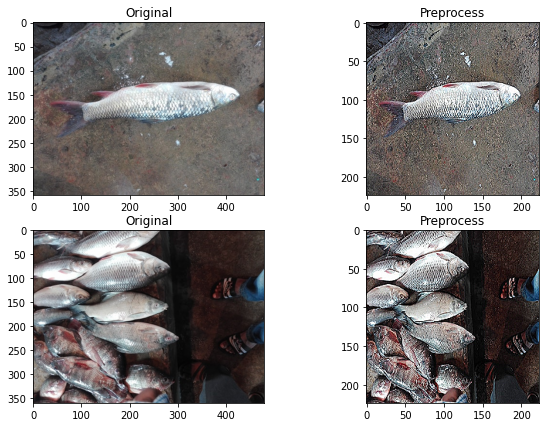

In [40]:
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(221)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.subplot(222)
plt.imshow(cv2.cvtColor(fresh, cv2.COLOR_BGR2RGB))
plt.title("Preprocess")
plt.subplot(223)
plt.imshow(cv2.cvtColor(original1, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.subplot(224)
plt.imshow(cv2.cvtColor(fresh1, cv2.COLOR_BGR2RGB))
plt.title("Preprocess")

In [41]:
p=model.predict(fresh[np.newaxis, ...])
labels ={0:"Black Spot",1:"Fresh Fish",2:"Red Spot",3:"White Spot"}
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:", predicted_class, "\n\n")

Classified: Fresh Fish 




In [42]:
p=model.predict(fresh1[np.newaxis, ...])
labels ={0:"Black Spot",1:"Fresh Fish",2:"Red Spot",3:"White Spot"}
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:", predicted_class, "\n\n")

Classified: Fresh Fish 


